## NYPD Motor Vehicle Collision Data

### Overview

'The Motor Vehicle Collisions - Crash' table contains details on the crash events. Each row represents a crash event. The data tables contain information from all police reported motor vehicle collisions in NYC. The dataset can be found by following this link: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

### High-Level Description

The data dates from 2012 to the current day, with data being updated on a daily basis. At the time of this writing, there are 1.59 million rows, each row representing a crash event, and 29 columns which represent date, time, borough, zip code, latitude, longitude, location, on and off street name, cross street name, number of persons injured, number of persons killed, number of pedestrians injured, number of pedestrians killed, number of cyclist injured, number of cyclist killed, number of motorist injured, number of motorist killed, contributing factors, vehicle type codes and collision ID.

### Bring in the data

Let's start by bringing in the data! I'm going to limit this to 1000000 rows.

In [1]:
import pandas as pd
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=1000000", low_memory=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 4)

Let's look at the first 10 rows to get an idea of how the dataset looks like.

In [2]:
pd.set_option('display.max_rows', 10)
datanyc.head(10)

,accident_date,accident_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-07-28T00:00:00.000,11:45,QUEENS,11429,40.713303,-73.735860,POINT (-73.73586 40.713303),HEMPSTEAD AVENUE,SPRINGFIELD BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4178166,Sedan,Sedan,NaN,NaN,NaN
1,2019-08-18T00:00:00.000,0:00,MANHATTAN,10017,40.754250,-73.968990,POINT (-73.96899 40.75425),EAST 49 STREET,2 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4190122,Taxi,Taxi,NaN,NaN,NaN
2,2019-08-07T00:00:00.000,20:25,QUEENS,11373,40.744870,-73.876290,POINT (-73.87629 40.74487),WHITNEY AVENUE,GLEANE STREET,NaN,2.0,0.0,0,0,0,0,2,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4185323,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2019-08-21T00:00:00.000,13:35,MANHATTAN,10007,40.714935,-74.011460,POINT (-74.01146 40.714935),NaN,NaN,89 MURRAY STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4196099,Sedan,Pick-up Truck,NaN,NaN,NaN
4,2019-07-29T00:00:00.000,20:15,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE,EAST 59 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4192287,Station Wagon/Sport Utility Vehicle,E-Bik,NaN,NaN,NaN
5,2019-08-21T00:00:00.000,21:40,QUEENS,11102,40.771996,-73.933304,POINT (-73.933304 40.771996),8 STREET,MAIN AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193120,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
6,2019-08-22T00:00:00.000,13:50,BROOKLYN,11235,40.576550,-73.966385,POINT (-73.966385 40.57655),BRIGHTON BEACH AVENUE,BRIGHTON 1 ROAD,NaN,0.0,0.0,0,0,0,0,0,0,Other Vehicular,NaN,NaN,NaN,NaN,4193270,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
7,2019-08-03T00:00:00.000,19:45,QUEENS,11417,40.671932,-73.851650,POINT (-73.85165 40.671932),NORTH CONDUIT AVENUE,84 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4182452,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
8,2019-07-26T00:00:00.000,8:42,NaN,NaN,40.809290,-73.903130,POINT (-73.90313 40.80929),BRUCKNER EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Other Vehicular,NaN,NaN,NaN,4177268,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
9,2019-08-12T00:00:00.000,13:09,BRONX,10459,40.821598,-73.897870,POINT (-73.89787 40.821598),ROGERS PLACE,WESTCHESTER AVENUE,NaN,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4187573,Sedan,NaN,NaN,NaN,NaN


Next, I will rename some of the columns to make things easier while analyzing the data.

In [3]:
datanyc.rename(columns={'number_of_persons_injured' : 'persons_injured',
                        'number_of_persons_killed' : 'persons_killed',
                        'number_of_pedestrians_injured' : 'pedestrians_injured',
                        'number_of_pedestrians_killed' : 'pedestrians_killed',
                        'number_of_cyclist_injured' : 'cyclist_injured',
                        'number_of_cyclist_killed' : 'cyclist_killed',
                        'number_of_motorist_injured'  : 'motorist_injured',
                        'number_of_motorist_killed' : 'motorist_killed',
                        'accident_date' : 'date',
                         'accident_time' : 'time'},inplace=True)
datanyc.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-07-28T00:00:00.000,11:45,QUEENS,11429,40.713303,-73.73586,POINT (-73.73586 40.713303),HEMPSTEAD AVENUE,SPRINGFIELD BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4178166,Sedan,Sedan,NaN,NaN,NaN
1,2019-08-18T00:00:00.000,0:00,MANHATTAN,10017,40.754250,-73.96899,POINT (-73.96899 40.75425),EAST 49 STREET,2 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4190122,Taxi,Taxi,NaN,NaN,NaN
2,2019-08-07T00:00:00.000,20:25,QUEENS,11373,40.744870,-73.87629,POINT (-73.87629 40.74487),WHITNEY AVENUE,GLEANE STREET,NaN,2.0,0.0,0,0,0,0,2,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4185323,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2019-08-21T00:00:00.000,13:35,MANHATTAN,10007,40.714935,-74.01146,POINT (-74.01146 40.714935),NaN,NaN,89 MURRAY STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4196099,Sedan,Pick-up Truck,NaN,NaN,NaN
4,2019-07-29T00:00:00.000,20:15,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE,EAST 59 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4192287,Station Wagon/Sport Utility Vehicle,E-Bik,NaN,NaN,NaN


I am interested in seeing whether there is a statistical difference between the number of deaths by borough and by season. I may also investigate further about the accident hours. So, I will first do some data cleaning (by focusing on only the columns that I am interested in) and add `seasons` and `hour` columns to the dataset.

I'll begin by removing some columns, keeping only those missing fewer than 30% of their values. I can also drop some columns which I know I will not going to use. 

In [4]:
clean_nyc = datanyc.dropna(thresh=(0.30 * datanyc.shape[0]), axis=1).copy()
clean_nyc.drop(columns=["collision_id", "on_street_name", "off_street_name"], inplace=True)
clean_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
date                             1000000 non-null object
time                             1000000 non-null object
borough                          659237 non-null object
zip_code                         659056 non-null object
latitude                         905160 non-null float64
longitude                        905160 non-null float64
location                         905160 non-null object
persons_injured                  999983 non-null float64
persons_killed                   999969 non-null float64
pedestrians_injured              1000000 non-null int64
pedestrians_killed               1000000 non-null int64
cyclist_injured                  1000000 non-null int64
cyclist_killed                   1000000 non-null int64
motorist_injured                 1000000 non-null int64
motorist_killed                  1000000 non-null int64
contributing_factor_vehicle_1    997049 no

And what about the percentage of the missing values now?

In [5]:
pd.set_option('display.max_columns', 29)
clean_nyc.isnull().mean().round(4) * 100

date                              0.00
time                              0.00
borough                          34.08
zip_code                         34.09
latitude                          9.48
                                 ...  
motorist_killed                   0.00
contributing_factor_vehicle_1     0.30
contributing_factor_vehicle_2    14.07
vehicle_type_code1                0.44
vehicle_type_code2               20.22
Length: 19, dtype: float64

That is good enough. Next, as I saw above under 'info', the `persons_injured` and `persons_killed` column values are float. Let's change them to integer, just like the values in other columns related to number of persons injured and killed.

In [6]:
clean_nyc['persons_injured'] = clean_nyc.persons_injured.astype('Int32')
clean_nyc['persons_killed'] = clean_nyc.persons_killed.astype('Int32')
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
0,2019-07-28T00:00:00.000,11:45,QUEENS,11429,40.713303,-73.73586,POINT (-73.73586 40.713303),0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,Sedan,Sedan
1,2019-08-18T00:00:00.000,0:00,MANHATTAN,10017,40.754250,-73.96899,POINT (-73.96899 40.75425),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Taxi,Taxi
2,2019-08-07T00:00:00.000,20:25,QUEENS,11373,40.744870,-73.87629,POINT (-73.87629 40.74487),2,0,0,0,0,0,2,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle
3,2019-08-21T00:00:00.000,13:35,MANHATTAN,10007,40.714935,-74.01146,POINT (-74.01146 40.714935),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck
4,2019-07-29T00:00:00.000,20:15,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,E-Bik


Let's look at our dates to make sure they are all in the same format:

In [7]:
clean_nyc[['date', 'time']].head()

,date,time
0,2019-07-28T00:00:00.000,11:45
1,2019-08-18T00:00:00.000,0:00
2,2019-08-07T00:00:00.000,20:25
3,2019-08-21T00:00:00.000,13:35
4,2019-07-29T00:00:00.000,20:15


The `date` column needs some fixing. I will transform the string timestamp for `date` to a true datetime data type.

In [8]:
clean_nyc['date'] = pd.to_datetime(clean_nyc['date'])
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
0,2019-07-28,11:45,QUEENS,11429,40.713303,-73.73586,POINT (-73.73586 40.713303),0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,Sedan,Sedan
1,2019-08-18,0:00,MANHATTAN,10017,40.754250,-73.96899,POINT (-73.96899 40.75425),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Taxi,Taxi
2,2019-08-07,20:25,QUEENS,11373,40.744870,-73.87629,POINT (-73.87629 40.74487),2,0,0,0,0,0,2,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle
3,2019-08-21,13:35,MANHATTAN,10007,40.714935,-74.01146,POINT (-74.01146 40.714935),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck
4,2019-07-29,20:15,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,E-Bik


Now, I will create a new column which will carry the values for hours only. I will create a new column called `hour` in which I will only have the hours instead of hours and minutes.

In [9]:
clean_nyc['time'] = pd.to_datetime(clean_nyc.time)
clean_nyc['hour'] = clean_nyc['time'].dt.hour
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2,hour
0,2019-07-28,2019-11-23 11:45:00,QUEENS,11429,40.713303,-73.73586,POINT (-73.73586 40.713303),0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,Sedan,Sedan,11
1,2019-08-18,2019-11-23 00:00:00,MANHATTAN,10017,40.754250,-73.96899,POINT (-73.96899 40.75425),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Taxi,Taxi,0
2,2019-08-07,2019-11-23 20:25:00,QUEENS,11373,40.744870,-73.87629,POINT (-73.87629 40.74487),2,0,0,0,0,0,2,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle,20
3,2019-08-21,2019-11-23 13:35:00,MANHATTAN,10007,40.714935,-74.01146,POINT (-74.01146 40.714935),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck,13
4,2019-07-29,2019-11-23 20:15:00,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,E-Bik,20


I am also interested in seeing whether the number of accidents rise during a particular season. I will add a variable that shows the season in which a collision occurred.

In [10]:
clean_nyc['date'] = pd.to_datetime(clean_nyc.date)
clean_nyc['date'].dt.month.head(20)

0     7
1     8
2     8
3     8
4     7
     ..
15    8
16    7
17    8
18    8
19    8
Name: date, Length: 20, dtype: int64

In [11]:
def season(date):
    if date.month in ([3, 4, 5]):
        val = 'Spring'
    elif date.month in ([6, 7, 8]):
        val = 'Summer'
    elif date.month in ([9, 10, 11]):
        val = 'Autumn'
    elif date.month in ([12, 1, 2]):
        val = 'Winter'
    else:
        val = "Unspecified"
    return val

clean_nyc['season'] = clean_nyc['date'].apply(season)

clean_nyc['season'].value_counts()

Summer    317750
Spring    291937
Autumn    227686
Winter    162627
Name: season, dtype: int64

Let's see whether our dataset have our new `season` and `hour` columns. 

In [12]:
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2,hour,season
0,2019-07-28,2019-11-23 11:45:00,QUEENS,11429,40.713303,-73.73586,POINT (-73.73586 40.713303),0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,Sedan,Sedan,11,Summer
1,2019-08-18,2019-11-23 00:00:00,MANHATTAN,10017,40.754250,-73.96899,POINT (-73.96899 40.75425),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Taxi,Taxi,0,Summer
2,2019-08-07,2019-11-23 20:25:00,QUEENS,11373,40.744870,-73.87629,POINT (-73.87629 40.74487),2,0,0,0,0,0,2,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle,20,Summer
3,2019-08-21,2019-11-23 13:35:00,MANHATTAN,10007,40.714935,-74.01146,POINT (-74.01146 40.714935),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck,13,Summer
4,2019-07-29,2019-11-23 20:15:00,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,E-Bik,20,Summer


# Statistical Tests

### ANOVA

I will begin by looking at whether there is a difference between the number of deaths by borough. I will use one way ANOVA test for that since I have more than two boroughs (more than two nominal variables).

I will first drop the NaN's in the `persons_killed` column to be able to do the ANOVA test.

In [42]:
from scipy import stats

clean_nyc.dropna(subset = ['persons_killed'], how='all', inplace=True)

stats.f_oneway(clean_nyc[['persons_killed']][clean_nyc['borough']=="MANHATTAN"],
              clean_nyc[['persons_killed']][clean_nyc['borough']=="STATEN ISLAND"],
              clean_nyc[['persons_killed']][clean_nyc['borough']=="BRONX"],
              clean_nyc[['persons_killed']][clean_nyc['borough']=="QUEENS"],
              clean_nyc[['persons_killed']][clean_nyc['borough']=="BROOKLYN"])

F_onewayResult(statistic=array([1.71193251]), pvalue=array([0.14415855]))

That is not a low p value. We are not seeing a statistically significant difference.

In [14]:
stats.f_oneway(clean_nyc[['motorist_killed']][clean_nyc['borough']=="MANHATTAN"],
              clean_nyc[['motorist_killed']][clean_nyc['borough']=="STATEN ISLAND"],
              clean_nyc[['motorist_killed']][clean_nyc['borough']=="BRONX"],
              clean_nyc[['motorist_killed']][clean_nyc['borough']=="QUEENS"],
              clean_nyc[['motorist_killed']][clean_nyc['borough']=="BROOKLYN"])

F_onewayResult(statistic=array([6.81409038]), pvalue=array([1.76462423e-05]))

A very low p value! We are seeing a difference.

Our null hypothesis was that all the boroughs have the same mean for the number of motorists killed in accidents. That null hypothesis is highly unlikely and one or more of these boroughs is different than the others.

In [15]:
stats.f_oneway(clean_nyc[['cyclist_killed']][clean_nyc['borough']=="MANHATTAN"],
              clean_nyc[['cyclist_killed']][clean_nyc['borough']=="STATEN ISLAND"],
              clean_nyc[['cyclist_killed']][clean_nyc['borough']=="BRONX"],
              clean_nyc[['cyclist_killed']][clean_nyc['borough']=="QUEENS"],
              clean_nyc[['cyclist_killed']][clean_nyc['borough']=="BROOKLYN"])

F_onewayResult(statistic=array([2.97975963]), pvalue=array([0.01796427]))

Our p value is less than 0.05, which means that it is statistically significant. There seems to be a difference in the mean number of cyclists killed by borough.

In [16]:
stats.f_oneway(clean_nyc[['pedestrians_killed']][clean_nyc['borough']=="MANHATTAN"],
              clean_nyc[['pedestrians_killed']][clean_nyc['borough']=="STATEN ISLAND"],
              clean_nyc[['pedestrians_killed']][clean_nyc['borough']=="BRONX"],
              clean_nyc[['pedestrians_killed']][clean_nyc['borough']=="QUEENS"],
              clean_nyc[['pedestrians_killed']][clean_nyc['borough']=="BROOKLYN"])

F_onewayResult(statistic=array([0.20873398]), pvalue=array([0.9337039]))

Our p value is not less than 0.05. There seems to be no difference in the number of pedestrians killed by borough.

So, there is a difference in the numbers of motorists and cyclists killed, but there is no difference in the numbers of pedestrians and persons killed by borough.

While I am at it, I also want to see whether there is a difference in the numbers of persons killed by season.

In [17]:
clean_nyc.season.unique()

array(['Summer', 'Autumn', 'Spring', 'Winter'], dtype=object)

In [43]:
stats.f_oneway(clean_nyc[['persons_killed']][clean_nyc['season']=="Autumn"],
              clean_nyc[['persons_killed']][clean_nyc['season']=="Spring"],
              clean_nyc[['persons_killed']][clean_nyc['season']=="Summer"],
              clean_nyc[['persons_killed']][clean_nyc['season']=="Winter"])

F_onewayResult(statistic=array([1.31719818]), pvalue=array([0.26673935]))

The p value is not statistically significant (0.3 which is more than a 5% chance). This may suggest what we are seeing here in our sample data cannot be a real difference. We cannot reject the null hypothesis.

ANOVA can tell there is a difference but can't tell which borough (or boroughs) is different. We need to do some comparisons to see which borough (or boroughs) is the outlier. Let's try two-sample T-tests.

### Two-Sample T-Tests

I will begin by using two-sample T-test to measure whether numbers of motorists killed has a mean that differs between Manhattan and Staten Island. The two-sample T-test assumes that the distribution of values in each group follows a normal distribution ("bell curve"). Let's confirm that this is true for numbers of motorists killed in Manhattan and Staten Island.

I will first drop the NaN's in the `motorist_killed` column to be able to do the T-test.

In [19]:
clean_nyc.dropna(subset = ['motorist_killed'], how='all', inplace=True)

stats.ttest_ind(clean_nyc[['motorist_killed']][clean_nyc['borough'] == 'MANHATTAN'], clean_nyc[['motorist_killed']][clean_nyc['borough'] == 'STATEN ISLAND'])

Ttest_indResult(statistic=array([-4.74436524]), pvalue=array([2.0932525e-06]))

The statistic here represents the distance between the two means, in terms of standard deviations. That is a very small p value and it is statistically significant. There is a difference between Manhattan and Staten Island. What about Brooklyn and Staten Island.

In [20]:
stats.ttest_ind(clean_nyc[['motorist_killed']][clean_nyc['borough'] == 'BROOKLYN'], clean_nyc[['motorist_killed']][clean_nyc['borough'] == 'STATEN ISLAND'])

Ttest_indResult(statistic=array([-1.47186254]), pvalue=array([0.14105935]))

Our p value is more than 0.05, so no statistically significant difference. We cannot reject the null hypothesis (which is that the motorists killed means are equal in each borough).

What about Queens and Manhattan?

In [21]:
stats.ttest_ind(clean_nyc[['motorist_killed']][clean_nyc['borough'] == 'QUEENS'], clean_nyc[['motorist_killed']][clean_nyc['borough'] == 'MANHATTAN'])

Ttest_indResult(statistic=array([4.93250787]), pvalue=array([8.12201336e-07]))

Our p value is very small this time! There is a little difference... but what about the effect size? Are they really that different? Let's define cohen's d to measure the effect size. Let's look at the effect size for the difference between Manhattan and Queens.

In [22]:
from numpy import var, mean
from math import sqrt
def cohens_d (first, second):
  s1, s2 = var(first, ddof=1), var(second, ddof=1)
  std = sqrt(((len(first) - 1) * s1 + (len(second) - 1) * s2) / (len(first) + len(second) - 2))
  return (mean(first)-  mean(second)) / std

In [23]:
cohens_d(clean_nyc[['motorist_killed']][clean_nyc['borough']=="MANHATTAN"], 
                clean_nyc[['motorist_killed']][clean_nyc['borough']=="QUEENS"])

motorist_killed   -0.017307
dtype: float64

It looks like the difference is trivial. It is a very small effect size which indicates that the difference between them is not very large.

What about the effect size for Manhattan and Staten Island?

In [44]:
cohens_d(clean_nyc[['motorist_killed']][clean_nyc['borough']=="MANHATTAN"], 
                clean_nyc[['motorist_killed']][clean_nyc['borough']=="STATEN ISLAND"])

motorist_killed   -0.031362
dtype: float64

Again, the difference is trivial. It is a very small effect size which indicates that the difference between them is not statistically significant.

## Chi-Square 

Chi-square, or chi-squared, is a measure of independence of categorical variables. Here I will be looking at categories like `borough` and `season`. Chi-square requires frequency counts or a contingency table.

In [24]:
contingency_table = pd.crosstab(
    clean_nyc['borough'], clean_nyc['season'],
    margins = True)

contingency_table

season,Autumn,Spring,Summer,Winter,All
borough,,,,,
BRONX,21329,29162,31114,15995,97600
BROOKLYN,44662,62518,66897,32732,206809
MANHATTAN,31199,46824,48624,21927,148574
QUEENS,39939,52908,57331,29024,179202
STATEN ISLAND,5536,8492,8364,4660,27052
All,142665,199904,212330,104338,659237


In [25]:
stats.chi2_contingency(contingency_table)

(415.9744916805683,
 9.862066120654257e-76,
 20,
 array([[ 21121.54505891,  29595.77572254,  31435.4443091 ,
          15447.23490945,  97600.        ],
        [ 44755.38536975,  62711.81128486,  66609.96723485,
          32731.83611053, 206809.        ],
        [ 32152.79134818,  45052.89735861,  47853.37810226,
          23514.93319095, 148574.        ],
        [ 38780.97456605,  54340.391404  ,  57718.18126106,
          28362.45276888, 179202.        ],
        [  5854.30365711,   8203.12422998,   8713.02909272,
           4281.54302019,  27052.        ],
        [142665.        , 199904.        , 212330.        ,
         104338.        , 659237.        ]]))

Our chi-square value is 415.98 and p value is, well, very low. It is statistically significant. That suggests that the variable `season` is somehow related to the variable `borough`. Season did influence the number of accidents in each borough. 

#### Some unrelated extra play time

I want to visualize the accident hours in Manhattan and Staten Island with a bell curve. I will use seaborn for data visualization. 

In [26]:
import seaborn as sns

sns.distplot(clean_nyc[['hour']][clean_nyc['borough'] == 'MANHATTAN'])

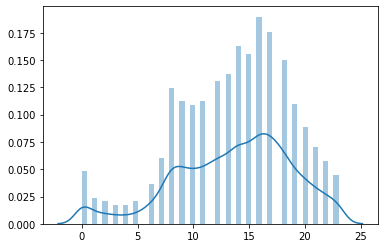

In [27]:
sns.distplot(clean_nyc[['hour']][clean_nyc['borough'] == 'STATEN ISLAND'])

Neither of these is a perfect bell, but they're close enough. The average is a little different but there is a lot of overlap in the middle.  Can I do a two sample T test for hours to see the proportion of the difference between their means and natural spread?

In [28]:
stats.ttest_ind(clean_nyc[['hour']][clean_nyc['borough'] == 'STATEN ISLAND'], clean_nyc[['hour']][clean_nyc['borough'] == 'MANHATTAN'])

Ttest_indResult(statistic=array([10.1908008]), pvalue=array([2.21397267e-24]))

Very low p value. There is statistically significant difference in the mean accident hours.

And below.. a visualization to see the number of accidents by season.

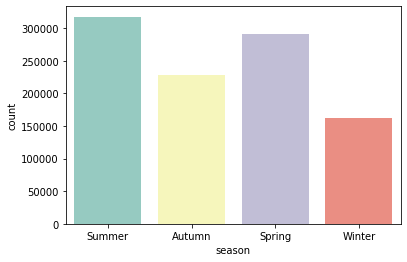

In [29]:
ax = sns.countplot(x='season', data=clean_nyc, palette='Set3')

I want to also do different things with the contingency table. For example, I want to see the counts. First, I will create a new table with `borough` and `persons_killed`.

In [30]:
contingency_table3 = pd.crosstab(
    clean_nyc['borough'], clean_nyc['persons_killed'],
    margins = True)

contingency_table3

persons_killed,0,1,2,3,4,8,All
borough,,,,,,,
BRONX,97509,84,0,0,0,0,97593
BROOKLYN,206600,199,4,1,0,0,206804
MANHATTAN,148456,111,0,0,0,1,148568
QUEENS,179014,180,2,1,1,0,179198
STATEN ISLAND,27023,28,0,0,0,0,27051
All,658602,602,6,2,1,1,659214


In [31]:
colsum=contingency_table3.sum(axis=0)
colsum

persons_killed
0      1317204
1         1204
2           12
3            4
4            2
8            2
All    1318428
dtype: int64

What if I only want to see the sum of the accidents in which one person was killed (aka sum of the second column)?

In [32]:
colsum[1]

1204

What about the percentages?

In [33]:
colpct=contingency_table3/colsum
colpct.round(2)

persons_killed,0,1,2,3,4,8,All
borough,,,,,,,
BRONX,0.07,0.07,0.00,0.00,0.0,0.0,0.07
BROOKLYN,0.16,0.17,0.33,0.25,0.0,0.0,0.16
MANHATTAN,0.11,0.09,0.00,0.00,0.0,0.5,0.11
QUEENS,0.14,0.15,0.17,0.25,0.5,0.0,0.14
STATEN ISLAND,0.02,0.02,0.00,0.00,0.0,0.0,0.02
All,0.50,0.50,0.50,0.50,0.5,0.5,0.50


Brooklyn and Queens' percentages are very close in in terms of the accidents in which one person was killed, however that is not the case for the accidents in which more than one person or no person was killed. 

## Thank you for reading!